Импортируем необходимые библиотеки, убираем предупреждения Anaconda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

Сгенерируем выборку объёма 1000 из непрерывного распределения Парето (с  b=3). 
Распределе́ние Паре́то в теории вероятностей — двухпараметрическое семейство абсолютно непрерывных распределений, являющихся степенными. Называется по имени Вилфредо Парето. Встречается при исследовании различных явлений, в частности, социальных, экономических, физических и других. Вне области экономики иногда называется также распределением Брэдфорда.

In [10]:
b = 3
pareto = sts.pareto(b)
sample = pareto.rvs(1000)

Построим гистограмму выборки, и, поверх нее, теоретическую плотность распределения.

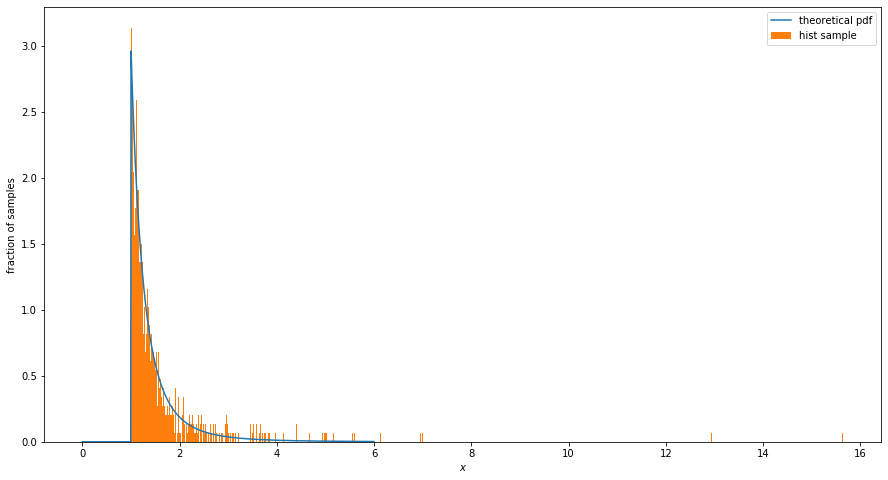

In [57]:
x = np.linspace(0,6, 1000)
pdf = pareto.pdf(x)
plt.figure(figsize=(15, 8))
plt.plot(x, pdf, label='theoretical pdf')
plt.hist(sample, normed=True, bins = 1000, label = 'hist sample')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper right')

Посчитаем среднее и дисперсию распределения Парето

In [136]:
meanp = pareto.mean()
disp = pareto.std()**2
print('Среднее распределения 𝜇:', meanp, '\n'
      'Дисперсия распределения:', disp)

Среднее распределения 𝜇: 1.5 
Дисперсия распределения: 0.7499999999999999


 сгенерируем 1000 выборок объёма 5 и построим гистограммы распределений их выборочных средних, поверх гистограммы построим плотность соответствующего нормального распределения с расчитанными выше средним и дисперсией

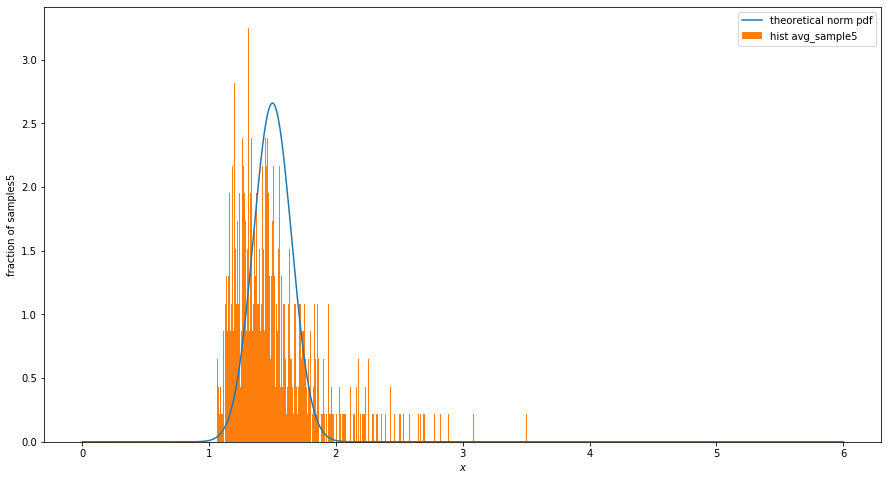

In [138]:
n5 = 5
norm_rv = sts.norm(meanp, disp/n5)
pdf_norm = norm_rv.pdf(x)
X5 = []
for i in range(1000):
    sample5 = pareto.rvs(n5)
    avg5 = np.mean(sample5)
    X5.append(avg5)

x = np.linspace(0,6, 1000)    
plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm, label='theoretical norm pdf')

plt.hist(X5, normed=True, bins = 1000, label = 'hist avg_sample5')
plt.ylabel('fraction of samples5')
plt.xlabel('$x$')
plt.legend(loc='upper right')

In [140]:
meanp

1.5

сгенерируем 1000 выборок объёма 15 и построим гистограммы распределений их выборочных средних

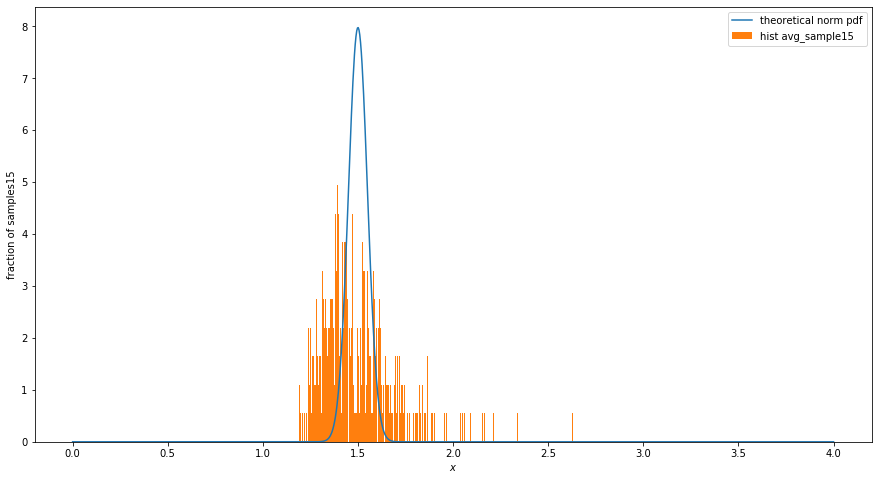

In [141]:
n15 = 15
norm_rv = sts.norm(meanp, disp/n15)
pdf_norm = norm_rv.pdf(x)
X15 = []
for i in range(1000):
    sample15 = pareto.rvs(n15)
    avg15 = np.mean(sample15)
    X15.append(avg15)

x = np.linspace(0,4, 1000)    
plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm, label='theoretical norm pdf')    
    
plt.hist(X15, normed=True, bins = 1000, label = 'hist avg_sample15')
plt.ylabel('fraction of samples15')
plt.xlabel('$x$')
plt.legend(loc='upper right')

In [146]:
meanp

1.5

сгенерируем 1000 выборок объёма 50 и построим гистограммы распределений их выборочных средних

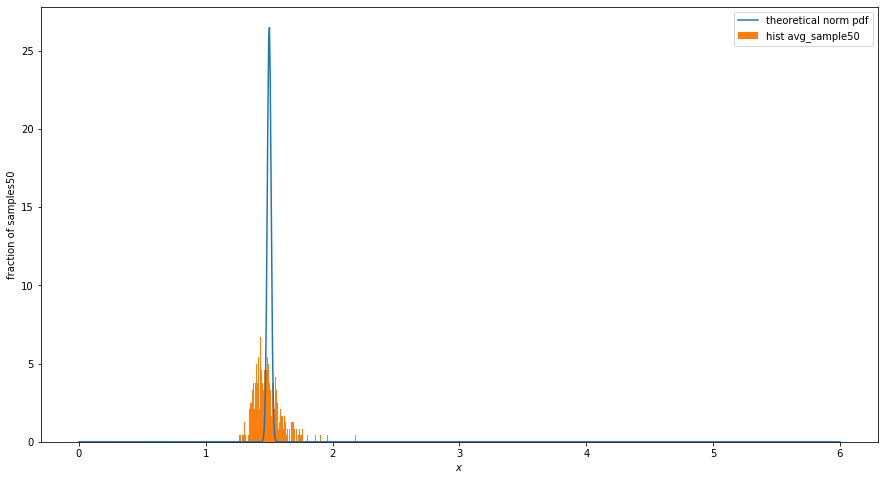

In [147]:
n50 = 50
norm_rv = sts.norm(meanp, disp/n50)
pdf_norm = norm_rv.pdf(x)
X50 = []
for i in range(1000):
    sample50 = pareto.rvs(n50)
    avg50 = np.mean(sample50)
    X50.append(avg50)

x = np.linspace(0,6, 1000)    
plt.figure(figsize=(15, 8))
plt.plot(x, pdf_norm, label='theoretical norm pdf')       
    
plt.hist(X50, normed=True, bins = 1000, label = 'hist avg_sample50')
plt.ylabel('fraction of samples50')
plt.xlabel('$x$')
plt.legend(loc='upper right')